In [109]:
from os import listdir
from os.path import join, isfile
from typing import List

In [110]:
def get_data_from_file(path: str):
    with open(path, "r") as f:
        data: List[List[int]] = []
        lines = f.readlines()
        for line in lines:
            data.append([int(c) for c in line.split()])
        return data


def get_paths_of_dir(path: str, extension: str):
    return [join(path, f) for f in listdir(path)
            if isfile(join(path, f)) and f.endswith(extension)]

In [111]:
inDirPath = "../../Input/"
inPaths = get_paths_of_dir(inDirPath, extension=".in")

In [112]:
n_problem = int(input("Elige el problema (1-5): "))

inDirFiles = listdir(inDirPath)
file_name = inDirFiles[n_problem - 1]

path = inPaths[n_problem - 1]
prob = get_data_from_file(path)

In [113]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

## Variable meanings.

* R = Number of rows.
* C = Number of columns.
* F = Number of vehicles.
* N = Pre-booked rides.
* B = Per-ride bonus for starting the ride on time.
* T = Simulation steps = distance between start and end.

In [114]:
# Problem data.
_, _, F, N, B, T = prob[0]

# Rides.
rides = prob[1:]

Bonus:
* Earn points proportional to distance of ride.
* Bonus if started on time. 

In [115]:
toolbox = base.Toolbox()

In [116]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [117]:
toolbox.register("attribute", random.randint, 0, F - 1)
toolbox.register("individual", tools.initRepeat,
                 creator.Individual, toolbox.attribute, n=N)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [118]:
def sort_rides(vehicle_rides):
    def sort_ride(ride):
        a, b, x, y, s, f = ride[1]
        origin = [a, b]
        destiny = [x, y]
        distance = dis(origin, destiny)

        return s + f - distance
    
    return sorted(vehicle_rides, key=lambda ride: sort_ride(ride))

def get_rides_from_ind(individual):
    vehicles_rides = np.full(F, None)
    
    for i, vehicle in enumerate(individual):
        v_r = vehicles_rides[vehicle]
        
        if v_r is None:
            v_r = []
            
        ride = rides[i]
        v_r.append([i, ride])
        
        vehicles_rides[vehicle] = v_r

    return vehicles_rides

def dis(a, b): return np.abs(a[0] - b[0]) + np.abs(a[1]-b[1])


In [119]:
def calc_fitness(car_rides):
    fitness = 0
    step = 0
    pos = [0, 0]
    
    # Sort car_rides given earliest time.
    car_rides = sort_rides(car_rides)

    for _, ride in car_rides:
        a, b, x, y, s, f = ride
        origin = [a, b]
        destiny = [x, y]
        earliest_start = s
        latest_finish = f
        
        # 1.- Go to origin.
        step += dis(pos, origin)
        
        # 2.- If arrived before the earliest time. Wait and earn bonus.
        if step <= earliest_start:
          fitness += B
          step = earliest_start
          
        # 3.- Go to destiny.
        dis_ori_des = dis(origin, destiny)
        step += dis_ori_des
        
        #4.- If reached destiny before latest finish. Earn points.
        if step <= latest_finish:
          fitness += dis_ori_des
          
        # 5.- Update position.
        pos = destiny
                  
        # 6.- Check if reached max distance with one vehicle.
        if step > T:
          break
    
    return fitness
        
def eval_ind(ind):
    all_rides = get_rides_from_ind(ind)

    fitness = 0

    for car_rides in all_rides:
        if car_rides is not None:
            fitness += calc_fitness(car_rides)

    return fitness,


In [120]:
NIND = 50

pop = toolbox.population(n=NIND)
print(f"Population: {pop}")

Population: [[217, 318, 83, 260, 275, 236, 34, 43, 248, 32, 24, 226, 87, 146, 219, 261, 14, 15, 93, 293, 264, 199, 37, 293, 332, 75, 16, 235, 275, 37, 196, 297, 37, 294, 108, 140, 201, 162, 186, 319, 104, 329, 105, 193, 193, 300, 228, 298, 328, 119, 237, 234, 171, 250, 72, 23, 161, 126, 206, 348, 110, 223, 254, 70, 244, 150, 167, 340, 4, 335, 22, 257, 155, 326, 278, 262, 230, 302, 50, 197, 214, 284, 341, 260, 85, 37, 68, 205, 79, 247, 212, 187, 151, 185, 197, 107, 22, 97, 4, 289, 341, 160, 145, 119, 287, 61, 56, 330, 296, 246, 7, 139, 206, 209, 6, 126, 1, 158, 50, 147, 249, 13, 56, 277, 204, 322, 316, 178, 15, 142, 167, 239, 109, 53, 193, 214, 128, 41, 54, 65, 84, 69, 83, 37, 16, 126, 191, 175, 247, 306, 174, 263, 324, 0, 66, 43, 205, 153, 249, 207, 344, 164, 15, 89, 238, 108, 114, 317, 63, 312, 245, 81, 205, 106, 19, 171, 32, 190, 199, 251, 275, 3, 51, 212, 51, 105, 7, 342, 135, 90, 172, 70, 11, 162, 103, 166, 158, 336, 29, 26, 323, 238, 312, 337, 334, 324, 279, 215, 227, 5, 77, 348, 

In [121]:
ind = toolbox.individual()

print("Individuo ANTES de evaluar")
print(ind)
print(ind.fitness.valid)
print("\n")

ind.fitness.values = eval_ind(ind)

print("Individuo TRAS evaluar")
print(ind)
print(ind.fitness.valid)
print(ind.fitness)

Individuo ANTES de evaluar
[237, 67, 270, 167, 91, 189, 268, 120, 226, 154, 32, 345, 174, 312, 299, 341, 140, 182, 36, 37, 176, 277, 111, 125, 183, 167, 249, 1, 329, 60, 153, 330, 142, 225, 173, 271, 55, 8, 74, 286, 52, 233, 258, 281, 90, 158, 229, 164, 33, 276, 288, 11, 133, 122, 207, 111, 195, 341, 216, 223, 116, 183, 272, 284, 289, 34, 88, 276, 89, 33, 253, 39, 300, 156, 293, 141, 55, 122, 291, 256, 317, 235, 136, 331, 342, 298, 277, 213, 94, 332, 121, 194, 12, 145, 66, 119, 251, 194, 153, 279, 232, 5, 108, 109, 254, 31, 249, 26, 277, 176, 107, 159, 246, 149, 111, 184, 267, 329, 294, 44, 332, 311, 68, 59, 72, 46, 325, 6, 71, 7, 127, 100, 310, 66, 204, 187, 204, 26, 120, 257, 133, 85, 346, 273, 302, 235, 167, 123, 173, 317, 261, 104, 275, 15, 154, 163, 185, 13, 115, 220, 131, 200, 63, 136, 105, 152, 80, 118, 227, 268, 247, 92, 15, 318, 161, 111, 147, 251, 222, 251, 41, 296, 245, 248, 49, 256, 206, 327, 31, 227, 201, 171, 332, 290, 129, 91, 263, 263, 271, 320, 310, 236, 177, 133, 246,

In [122]:
TOURNSIZE, INDPB = 3, 0.05

toolbox.register("select", tools.selTournament, tournsize=TOURNSIZE)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=INDPB)
toolbox.register("evaluate", eval_ind)

In [123]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [124]:
CXPB, MUTPB, NGEN = 1.0, 0.075, 15

pop, logbook = algorithms.eaSimple(
    pop, toolbox, CXPB, MUTPB, NGEN, stats, verbose=False)

best_sol = tools.selBest(pop, 1)[0]

print(f"El resultado de la evolución es:")
print(logbook)
print(f"La mejor solucion encontrada es: {best_sol}")


El resultado de la evolución es:
gen	nevals	avg        	std    	min        	max        
0  	50    	1.5787e+07 	85187.7	1.55697e+07	1.59446e+07
1  	50    	1.58007e+07	166411 	1.51585e+07	1.599e+07  
2  	50    	1.5843e+07 	162195 	1.50341e+07	1.60888e+07
3  	50    	1.58283e+07	187274 	1.51453e+07	1.61122e+07
4  	50    	1.58989e+07	142050 	1.53192e+07	1.60994e+07
5  	50    	1.58791e+07	203174 	1.52751e+07	1.61433e+07
6  	50    	1.59477e+07	105018 	1.55141e+07	1.60888e+07
7  	50    	1.5953e+07 	166249 	1.53422e+07	1.61451e+07
8  	50    	1.59921e+07	112309 	1.53051e+07	1.61288e+07
9  	50    	1.59743e+07	148094 	1.54383e+07	1.61343e+07
10 	50    	1.60011e+07	135229 	1.54871e+07	1.61891e+07
11 	50    	1.60104e+07	140071 	1.54746e+07	1.61891e+07
12 	50    	1.60285e+07	141751 	1.54161e+07	1.61984e+07
13 	50    	1.60398e+07	173660 	1.54882e+07	1.62047e+07
14 	50    	1.60664e+07	203448 	1.53919e+07	1.62068e+07
15 	50    	1.61595e+07	117687 	1.5588e+07 	1.62068e+07
La mejor solucion encontrada es:

[]

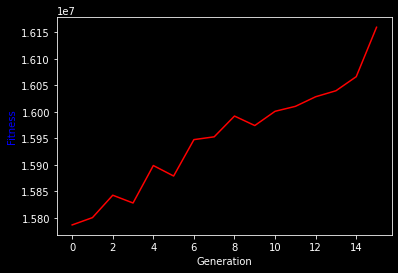

In [125]:
gen = logbook.select("gen")
avgs = logbook.select("avg")

fig = plt.figure()

ax = plt.gca()
line = ax.plot(gen, avgs, "r-", label="Average Fitness")
ax.set_xlabel("Generation")
ax.set_ylabel("Fitness", color="b")

plt.plot()

In [126]:
outDirPath = "../../Output/"
outFilePath = outDirPath + file_name.strip(".in") + ".out"

vehicles_rides = get_rides_from_ind(best_sol)

with open(outFilePath, "w") as f:
    for v_r in vehicles_rides:
      if v_r is None:
        f.write(str(0))
      else:
        v_r = sort_rides(v_r)    
        f.write(str(len(v_r)))
        f.write(" ")
        f.write(" ".join(str(pos) for pos, _ in v_r))
      
      f.write("\n")